In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd

In [7]:
from problem import Fokker_Planck_2d, Domain
from model import PDE_basis, TrainLS
# from my_utils import plot_2d_tri, plot_domain_2d

In [8]:
data = np.load('data/data.npz',allow_pickle=True)
my_prob = Fokker_Planck_2d( data=data)
x,u = my_prob.check_solution()
print(my_prob)


pde rmse: 3.1625423340346985e-17
***************************************************
Fokker_Planck (case=None):
	x_pde:   	(10000, 3)
	x_bd:    	(6300, 3)
	x_ic:    	None
	x_test:    	(2000, 3)
***************************************************


In [9]:
basis_num_vec = [ 1000, 2000, 3000,4000,5000]
shape_vec = [ 1, 1, 1.5, 1.5, 1.5]
print(len(shape_vec))
print(len(basis_num_vec))


5
5


In [10]:
temp_mse = []
for i in range(len(basis_num_vec)):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=3, basis_num=basis_num)
    basis.init_pde_basis(shape=shape_vec[i], radius=1.8)
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)

    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)

    print(basis_num,'Test MSE:', mse_test)
    temp_mse.append(mse_test)
mse_pde = np.array(temp_mse)

1000 Test MSE: 3.532709970065183e-05
2000 Test MSE: 1.0145279396785145e-06
3000 Test MSE: 2.030686347288772e-08
4000 Test MSE: 2.1349749476514432e-09
5000 Test MSE: 5.300730267970711e-10


In [11]:
# basis.init_dnn(init_type='default')


temp_mse = []
for i in range(len(basis_num_vec)):
    basis_num = basis_num_vec[i]
    basis = PDE_basis(x_dim=3, basis_num=basis_num)
    basis.init_dnn(init_type='default')
    train_ls = TrainLS(problem=my_prob, basis=basis)

    coef_sol, info1 = train_ls.ls_pde(current_ceof=None,weights=None,ls_mse=True,item_mse=False)
    mse_test, info2 = train_ls.get_mse_test(coef_sol=coef_sol)

    print(basis_num,'Test MSE:', mse_test)
    temp_mse.append(mse_test)

#
mse_dnn_default = np.array(temp_mse)

1000 Test MSE: 0.00010387120411118888
2000 Test MSE: 3.318556781606665e-05
3000 Test MSE: 2.9223937102465583e-05
4000 Test MSE: 2.5070304944051234e-05
5000 Test MSE: 2.2457204933356365e-05


In [14]:
df = pd.DataFrame({'basis_num': basis_num_vec,
                   'mse_dnn_default': mse_dnn_default,
                   'mse_pde_basis': mse_pde})
df.to_csv(f'ls.csv',header=True, index=False, encoding='utf-8')

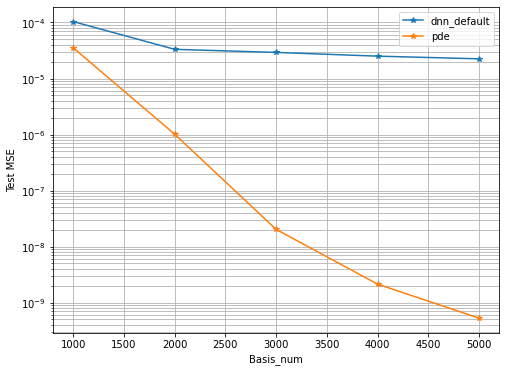

In [15]:
plt.figure(figsize=(8,6))
plt.plot(basis_num_vec, mse_dnn_default,'*-' ,label='dnn_default')
plt.plot(basis_num_vec, mse_pde,'*-', label='pde')
plt.yscale('log')
plt.legend()
plt.grid(which='both')
plt.xlabel('Basis_num')
plt.ylabel('Test MSE')
plt.show()
